In [ ]:
'''This program preforms the monte carlo simulation by assinging random weights to 4 stocks then it creates an effecient 
frontier to minimize volatility for each return value from 0-0.3'''

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [83]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')




In [84]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [85]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [86]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [87]:
# found the mean daily return for each stock
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [88]:
# found the correleation between each stock
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [89]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


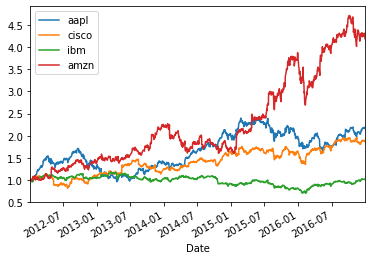

In [90]:
# normalized the stocks and graphed them
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [91]:
# found the daily return for each stock throughout the dates I put
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [92]:
#people say that log returs are different that arithmetic returns so I decided to do similar computaions with logaritmic returns 
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


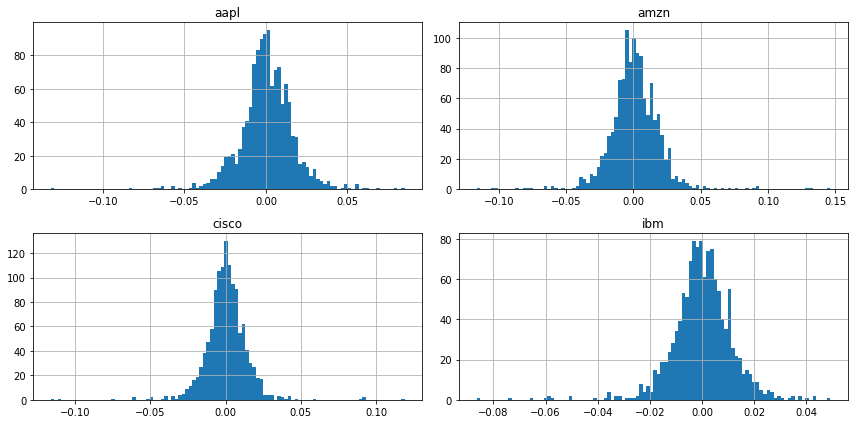

In [93]:
#graphed the logarthmic returns for each stock
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [94]:
# found the covariance for each stocks and multiplied it by the amount of trading days
log_ret.cov()*252 

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [95]:
# monte carlo simulation for random 4 stocks with made up values just to test my logic for the real program
# Create Random Weights
weights = np.array(np.random.random(4))



# Rebalance Weights
weights = weights / np.sum(weights)
print('The rebalanced sum is {}'.format(weights) )


# Expected Return
exp_ret = np.sum(log_ret.mean() * weights) *252
print('The Expected Portfolio Return is {}'.format(exp_ret))


# Expected Variance
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print('The Expected Volatility is {}'.format(exp_vol))


# Sharpe Ratio
SR = exp_ret/exp_vol
print('the sharpe ratio is {}'.format(SR))


The rebalanced sum is [0.07125678 0.43135894 0.09783836 0.39954592]
The Expected Portfolio Return is 0.18007987575621504
The Expected Volatility is 0.19306494784357117
the sharpe ratio is 0.9327424670692831


In [96]:
'''This is the monte carlo simulation so I first create a variable called numbers which is the amount of different weights
that the stocks could take I create 15000 0s the I then call create a return array which is the same amout of 0s
and the volatility array and a sharpe ratio. i then iterate throuh the amount of numbers and assign random weights to
each value of the list and then rebalance them we then save those weights as weights and then find the return by 
multiplying the weights by the average return by 252 to get the yearly return value we do the same with the volatility array
by using the covariance for the stocks, I then finlly calculate the sharpe ratio for each index by dividing the return
by the votality'''
numbers = 15000

all_weights = np.zeros((numbers,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(numbers):

    weights = np.array(np.random.random(4))

    weights = weights / np.sum(weights)
    
    all_weights[ind] = weights

    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [97]:
#I find where the sharp ratio is maximied 
sharpe_arr.max()

1.0286378081539405

In [106]:
#I then find on what index the sharpe ratio is the highest 
value=sharpe_arr.argmax()

In [107]:
# I then find what weightage each stock has that yields the highest sharpe ratio
all_weights[value]

array([0.25010224, 0.19069324, 0.0043925 , 0.55481202])

In [108]:
# I then see what the return and volatility is in this scenario where the sharpe ratio is max 
max_sr_ret = ret_arr[value]
max_sr_vol = vol_arr[value]

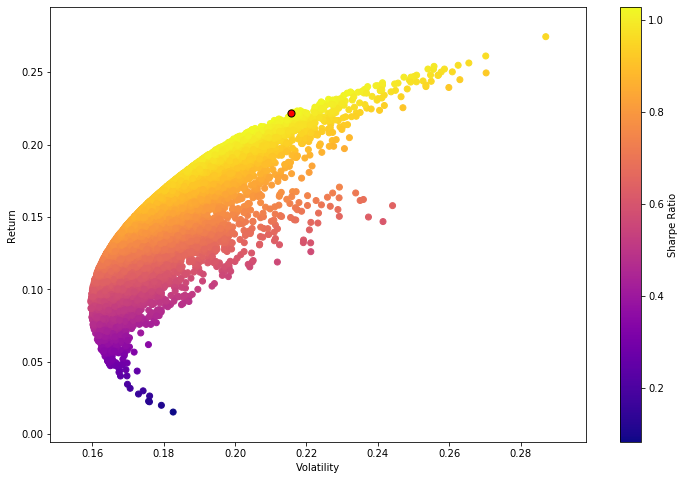

In [109]:
#plot the data 
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [111]:
# Our returns never exceed 0.3 so I create 300 equally spaced numbers from 1-300
frontier_y = np.linspace(0,0.3,100) 

[0.         0.0030303  0.00606061 0.00909091 0.01212121 0.01515152
 0.01818182 0.02121212 0.02424242 0.02727273 0.03030303 0.03333333
 0.03636364 0.03939394 0.04242424 0.04545455 0.04848485 0.05151515
 0.05454545 0.05757576 0.06060606 0.06363636 0.06666667 0.06969697
 0.07272727 0.07575758 0.07878788 0.08181818 0.08484848 0.08787879
 0.09090909 0.09393939 0.0969697  0.1        0.1030303  0.10606061
 0.10909091 0.11212121 0.11515152 0.11818182 0.12121212 0.12424242
 0.12727273 0.13030303 0.13333333 0.13636364 0.13939394 0.14242424
 0.14545455 0.14848485 0.15151515 0.15454545 0.15757576 0.16060606
 0.16363636 0.16666667 0.16969697 0.17272727 0.17575758 0.17878788
 0.18181818 0.18484848 0.18787879 0.19090909 0.19393939 0.1969697
 0.2        0.2030303  0.20606061 0.20909091 0.21212121 0.21515152
 0.21818182 0.22121212 0.22424242 0.22727273 0.23030303 0.23333333
 0.23636364 0.23939394 0.24242424 0.24545455 0.24848485 0.25151515
 0.25454545 0.25757576 0.26060606 0.26363636 0.26666667 0.26969

In [114]:
#minimizle volatility for given weights and grab the volatility 
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]
minimize_volatility([.2,.3,2.,3])

1.1277052327368582

In [116]:
# for every possible votality value what is the best return with the lowest volatility
frontier_volatility = []
# for the wrights get the returns and subtract the possible returns to get max returns
for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
   #using built in minimize function to minimize the volatility for each return value
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

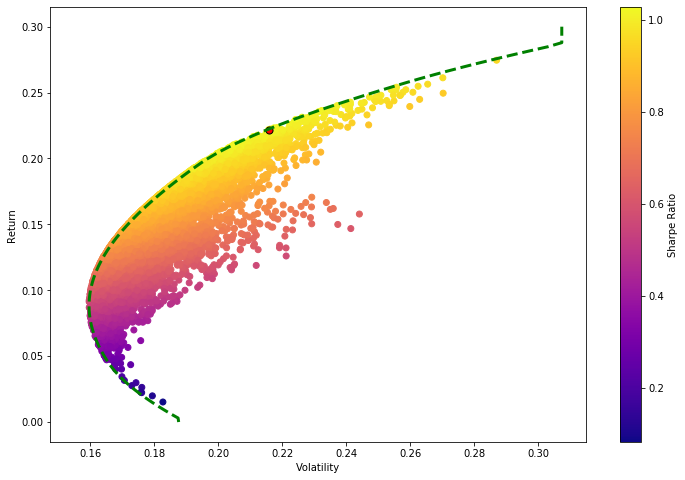

In [117]:
# graph the sharpe ratio dots 
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#graph red dot again
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)